In [154]:
'''If I collect butterflies and pin them to styrofoam this does not make me a scientist. 
If I collect data related to those butterflies like their physical attributes, their life spans, 
their flying patterns and their mating behavior this still does not qualify me as a scientist. 
If, however, I take those data and produce some conceptual abstraction in the form of laws or 
rules that capture the behavior of that phenomenon in the form of testable models, 
then I am doing science. These models can be passed on to future generations of scientists so that they may 
"stand on the shoulders of giants" and build a career around improving our understanding of the phenomenon.'''

'''Are testable models being built using real research on the underlying complexities that an organization 
is attempting to understand and anticipate?'''

'Are testable models being built using real research on the underlying complexities that an organization \nis attempting to understand and anticipate?'

In [155]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

# Read In Data

In [156]:
# Read in data from CSV
df = pd.read_csv('Fake_Data_3.csv')

# Num Rows and Columns

In [157]:
print('We have {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

We have 100 rows and 5 columns.


# Look at first few Values

In [158]:
df.head()

,id,treated,nucleus,cytoplasm,wall
0,1,0,4.66,96.36,9.82
1,2,0,0.43,89.74,35.16
2,3,0,2.58,29.76,3.33
3,4,0,0.56,66.66,21.06
4,5,0,4.99,93.80,8.26


# # Obs, # Null, DataType

In [159]:
df.info() # obs, # null, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id           100 non-null int64
treated      100 non-null int64
nucleus      100 non-null float64
cytoplasm    100 non-null float64
wall         100 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


# Count number and type of Categorical Vars in a column

In [160]:
#df["treated"].value_count() # only works on categorical / string vars?

# Check for Unique IDs and Missing Values

In [161]:
print('ID is unique.') if df.id.nunique() == df.shape[0] else print('oops')
print('We do not need to worry about missing values.') if df.count().min() == df.shape[0] else print('oops')

print("minimum num values", df.count().min()) 
print("number of rows", df.shape[0])

ID is unique.
We do not need to worry about missing values.
minimum num values 100
number of rows 100


# Stratified Summary Statistics

In [162]:
# http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/

bytreatment = df.groupby('treated')

bytreatment['cytoplasm'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,46.8060,28.551004,0.20,22.0425,41.660,72.15,96.36
1,50.0,94.5602,61.962369,0.52,38.1750,99.895,154.56,199.66


In [163]:
bytreatment['nucleus'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,2.3078,1.623435,0.12,0.915,2.13,4.035,4.99
1,50.0,5.2560,2.615361,0.59,3.215,5.36,7.115,9.90


In [164]:
bytreatment['wall'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,25.3156,14.636375,0.61,10.4750,27.815,37.4875,48.55
1,50.0,9.0270,5.774009,0.49,4.2825,9.310,12.9200,19.57


# Stratified Histograms

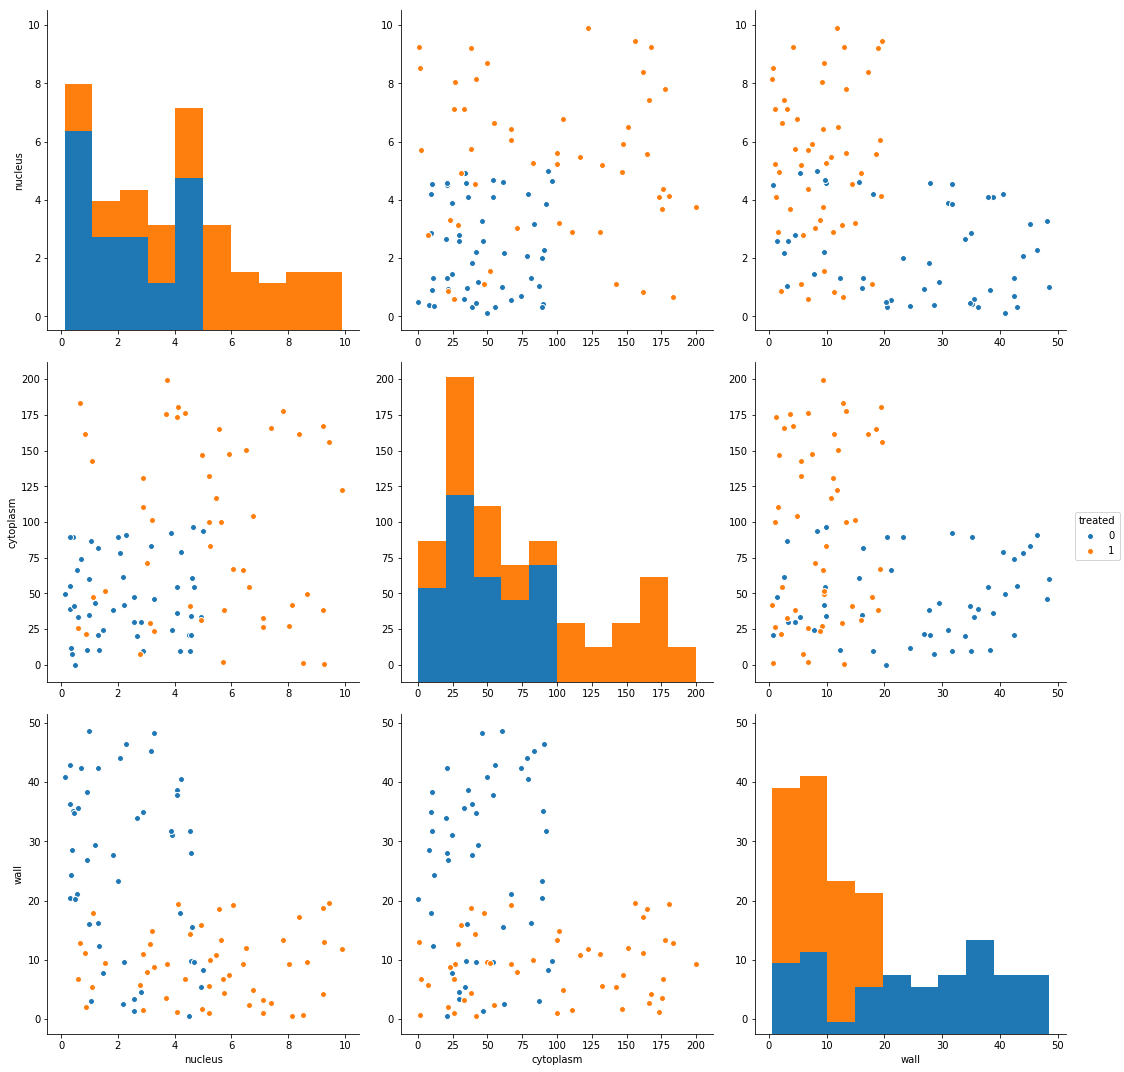

In [165]:
#https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
#sns.pairplot(x_vars=["nucleus"], y_vars=["cytoplasm"], data=df, hue="treated", size=5) # For a single scatterplot

sns.pairplot(vars=["nucleus","cytoplasm","wall"], data=df, hue="treated", size=5)


# Stratified Scatter Plot

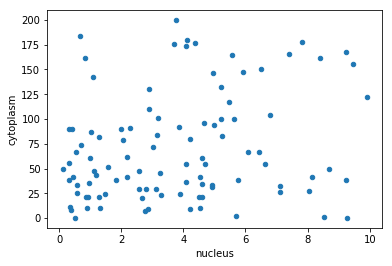

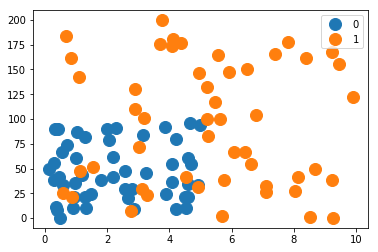

In [166]:
df.plot(kind="scatter", x="nucleus", y="cytoplasm") # This plots x on y but is not colored by treatment value

# https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

bytreatment = df.groupby('treated')

fig, ax = plt.subplots()
ax.margins(.05)

for name, treatment in bytreatment:
    ax.plot(treatment.nucleus, treatment.cytoplasm, marker='o', linestyle='', ms=12, label=name)
    #ax.plot(treatment.cytoplasm, treatment.wall, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

# Bokeh Scatter Plot

In [167]:
# Just overlap the two scatterplots onto the same document
# https://youtu.be/FMiGqwaYYAQ?t=9m16s

from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.layouts import row

doc = curdoc()
curdoc().clear()

p = figure(title="(nucleus, cytoplasm)", toolbar_location=None)
p.grid.grid_line_color = "#dddddd"
p.background_fill_color = "#ffffff"

p.scatter(df.nucleus, df.cytoplasm, marker="circle", size=12, line_color=None, fill_color="green", alpha=0.4)
p.scatter(df.nucleus, df.wall, marker="circle", size=12, line_color=None, fill_color="blue", alpha=0.4)

show(p)

# Correlation Between Two Variables

In [168]:
df['cytoplasm'].corr(df['wall'])

-0.21325549613696876

# Correlation Matrix Visualization

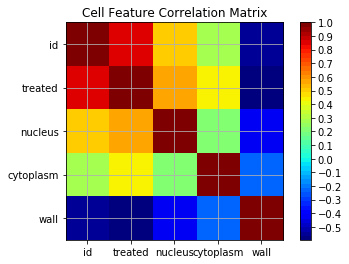

,id,treated,nucleus,cytoplasm,wall
id,1.000000,0.866069,0.510065,0.292888,-0.545724
treated,0.866069,1.000000,0.564626,0.447195,-0.594561
nucleus,0.510065,0.564626,1.000000,0.230552,-0.411291
cytoplasm,0.292888,0.447195,0.230552,1.000000,-0.213255
wall,-0.545724,-0.594561,-0.411291,-0.213255,1.000000


In [169]:
def correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Cell Feature Correlation Matrix')
    labels=['y','id','treated','nucleus','cytoplasm','wall','log_nucleus']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    plt.show()

correlation_matrix(df)

# Numerical Table
df.corr()

# Stratified Correlation Matrix Visualization

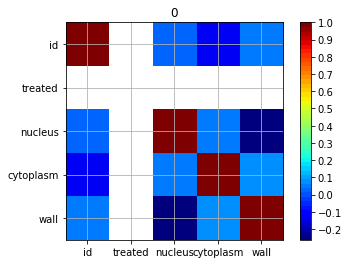

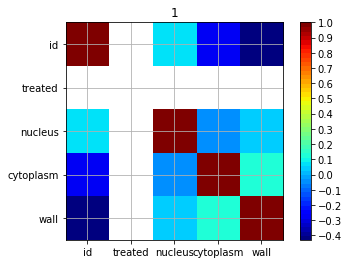

cytoplasm        id   nucleus      wall
treated                                                   
0       cytoplasm   1.000000 -0.131737  0.050205  0.078957
        id         -0.131737  1.000000  0.034732  0.052848
        nucleus     0.050205  0.034732  1.000000 -0.262449
        wall        0.078957  0.052848 -0.262449  1.000000
1       cytoplasm   1.000000 -0.268077 -0.052885  0.127344
        id         -0.268077  1.000000  0.063400 -0.429184
        nucleus    -0.052885  0.063400  1.000000  0.047644
        wall        0.127344 -0.429184  0.047644  1.000000

In [170]:
def stratified_correlation_matrix(df, name):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(name)
    labels=['y','id','treated','nucleus','cytoplasm','wall','log_nucleus']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    plt.show()
    
#for name, treatment in bytreatment:

for name, treatment in bytreatment:
    stratified_correlation_matrix(treatment, name)
    

# Numerical Table
bytreatment.corr()

# Try and identify the healthiest diseased cell.

 ### Lets create a composite score and see which cell scores the best

In [171]:
# https://stats.stackexchange.com/questions/276083/how-should-i-create-a-composite-score-from-my-multivariate-data-using-factor-ana
# http://jeromyanglim.blogspot.co.uk/2009/03/calculating-composite-scores-of-ability.html

# Try and see which cell is most like the healthy cells. We need mean values for the healthy cells. 
# Lets say that treated is diseased and untreated is healthy. 0 = healthy, 1 = diseased

bytreatment['nucleus'].mean()

treated
0    2.3078
1    5.2560
Name: nucleus, dtype: float64

In [172]:
bytreatment['cytoplasm'].mean()

treated
0    46.8060
1    94.5602
Name: cytoplasm, dtype: float64

In [173]:
bytreatment['wall'].mean()

treated
0    25.3156
1     9.0270
Name: wall, dtype: float64

In [174]:
# from sklearn.decomposition import PCA

# def doPCA(data):
#     pca =  PCA(n_components=2)
#     pca.fit(data)
#     return pca

# pca = doPCA(df)
# print(pca)
# print(pca.explained_varaince_ratio_)
# first_pc = pca.components_[0]
# second_pc = pca.components_[1]



In [175]:
# # Try and see which cell is most like the healthy cells. We need mean values for the healthy cells. 
# # Lets say that treated is diseased and untreated is healthy. 0 = healthy, 1 = diseased

# healthy_nucleus_mean = 2.3078
# diseased_nucleus_mean = 5.256

# healthy_cytoplasm_mean = 46.9060
# diseased_cytoplasm_mean = 94.5602

# healthy_wall_mean = 25.3156
# diseased_wall_mean = 9.0270

In [176]:
# # Create a weighted composite of nucleus, cytoplasm, wall

# #Convert each raw score to a z-score

# # print(bytreatment['nucleus'].std())
# # print(bytreatment['cytoplasm'].std())
# # print(bytreatment['wall'].std())

# healthy_nucleus_std = 1.623435
# diseased_nucleus_std = 2.615361

# healthy_cytoplasm_std = 28.551004
# diseased_cytoplasm_std = 61.962369

# healthy_wall_std = 15.636375
# diseased_wall_std = 5.77409

# #df['e'] = e.values
# #df.assign(nuc_score = 0)
# df['nuc_score'] = 0.0
# df['cyt_score'] = 0.0
# df['wall_score'] = 0.0

# for index, row in df.iterrows():
#     if row['treated'] == 0:
        
#         nuc_score = ((row['nucleus'] - healthy_nucleus_mean) / healthy_nucleus_std)
#         df.set_value(index,'nuc_score', nuc_score)
        
#         cyt_score = ((row['cytoplasm'] - healthy_cytoplasm_mean) / healthy_cytoplasm_std)
#         df.set_value(index,'cyt_score', cyt_score)
        
#         wall_score = ((row['wall'] - healthy_wall_mean) / healthy_wall_std)
#         df.set_value(index,'wall_score', wall_score)
        
#     else:
#         #print("not treated")
        
#         nuc_score = ((row['nucleus'] - diseased_nucleus_mean) / diseased_nucleus_std)
#         df.set_value(index,'nuc_score', nuc_score)
        
#         cyt_score = ((row['cytoplasm'] - diseased_cytoplasm_mean) / diseased_cytoplasm_std)
#         df.set_value(index,'cyt_score', cyt_score)
        
#         wall_score = ((row['wall'] - diseased_wall_mean) / diseased_wall_std)
#         df.set_value(index,'wall_score', wall_score)
    

# df.head()

In [191]:
#Lets try and do that an easier way.
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df[["nucleus","cytoplasm","wall"]])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ["nuc_norm", "cyt_norm", "wall_norm"]

# df.nuc_norm = df_normalized.nuc_norm
# df.cyt_norm = df_normalized.cyt_norm
# df.wall_norm = df_normalized.wall_norm
#df_normalized.score = df_normalized['2'] + df_normalized['3'] + df_normalized['4']

#df_normalized.head(100)
#df.head(100)


df_new = pd.concat([df, df_normalized])
df_new.head(100)

,cyt_norm,cytoplasm,id,nuc_norm,nucleus,treated,wall,wall_norm
0,NaN,96.36,1.0,NaN,4.66,0.0,9.82,NaN
1,NaN,89.74,2.0,NaN,0.43,0.0,35.16,NaN
2,NaN,29.76,3.0,NaN,2.58,0.0,3.33,NaN
3,NaN,66.66,4.0,NaN,0.56,0.0,21.06,NaN
4,NaN,93.80,5.0,NaN,4.99,0.0,8.26,NaN
5,NaN,10.58,6.0,NaN,1.33,0.0,12.38,NaN
6,NaN,89.48,7.0,NaN,0.32,0.0,20.44,NaN
7,NaN,45.82,8.0,NaN,3.26,0.0,48.23,NaN
8,NaN,10.03,9.0,NaN,4.53,0.0,31.72,NaN
9,NaN,36.03,10.0,NaN,4.08,0.0,38.74,NaN


In [ ]:
# We have a bunch of healthy cells
# We have a bunch of diseased cells
# We have a bunch of diseased+treatent cells

# The degree to which the diseased+treatment cells exhibit the disease exhibit diseased characteristics, that makes up the disease score
# The degree to which the diseased+treatment cells exhibit characteristics that neither the disease nor healthy cells exhibit, that makes up the side effect score.


# Disease Score - There are certain aspects that make up the disease profile. 
# The degree to which those phenotypes change in the perturbated cells makes up the disease score.

# The degree to which non-disease